In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                                
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from argopy import DataFetcher as ArgoDataFetcher
from argopy import IndexFetcher as ArgoIndexFetcher

# import sys, os
# sys.path.insert(0, "/Users/ericrehm/src/euroargodev/argopy/argopy/")

import argopy
from argopy.options import OPTIONS
print("argopy:", argopy.__version__, 
        "\nsrc:", argopy.__file__, 
        "\noptions:", OPTIONS)
# argopy.show_versions()

argopy: 0.1.7 
src: /Users/ericrehm/opt/anaconda2/envs/py3/lib/python3.8/site-packages/argopy/__init__.py 
options: {'src': 'erddap', 'local_ftp': '.', 'dataset': 'phy', 'cachedir': '/Users/ericrehm/.cache/argopy', 'mode': 'standard', 'api_timeout': 60}


In [32]:
# Fetch a single profile for which you know the float's wmoId and the profile number (34)

# argo_loader = ArgoDataFetcher(src='erddap', parallel=True)
argo_loader = ArgoDataFetcher(src='argovis', parallel=True)
# argo_loader = ArgoDataFetcher(mode='expert', src='localftp', local_ftp='/Users/ericrehm/ftp/outgoing/argo')

wmoId = 6903550
profileNumber = 34
ds = argo_loader.profile(wmoId, profileNumber).to_xarray().to_dataframe()
ds.head()

,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PSAL,TEMP,TIME_QC,TIME,LATITUDE,LONGITUDE
N_POINTS,,,,,,,,,,,,
0,34,R,A,6903550,1,0.36,35.046,5.662,1,2019-10-28T11:30:00.000Z,69.669755,3.950463
1,34,R,A,6903550,1,1.50,NaN,5.669,1,2019-10-28T11:30:00.000Z,69.669755,3.950463
2,34,R,A,6903550,1,2.50,35.045,5.670,1,2019-10-28T11:30:00.000Z,69.669755,3.950463
3,34,R,A,6903550,1,3.50,35.045,5.670,1,2019-10-28T11:30:00.000Z,69.669755,3.950463
4,34,R,A,6903550,1,4.60,35.045,5.670,1,2019-10-28T11:30:00.000Z,69.669755,3.950463


In [34]:
# Load profiles in a 3-D bounding defined by a lat,lon region (-75,-45,20,30), depth range (0-100 m), and a date period (2011-01 to 2011-02)
argo_loader_region = argo_loader.region([-75,-55,30.,40.,0,100., '2011-01-01', '2011-01-15'])

# Look at the different datastructures: xarray vs. Pandas dataframe

ds_points = argo_loader_region.to_xarray()      # as points
print(ds_points, '\n')

ds_profiles = ds_points.argo.point2profile()    # as profiles
print(ds_profiles, '\n')

df = ds_profiles.to_dataframe()                          # as profiles in a dataframe (table)
df.head()

<xarray.Dataset>
Dimensions:          (N_POINTS: 558)
Coordinates:
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 6 ... 552 553 554 555 556 557
    TIME             (N_POINTS) object '2011-01-02T11:14:06.001Z' ... '2011-0...
    LATITUDE         (N_POINTS) float64 37.28 37.28 37.28 ... 33.07 33.07 33.07
    LONGITUDE        (N_POINTS) float64 -66.77 -66.77 -66.77 ... -64.59 -64.59
Data variables:
    CYCLE_NUMBER     (N_POINTS) float64 150.0 150.0 150.0 ... 13.0 13.0 13.0
    DATA_MODE        (N_POINTS) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) float64 4.901e+06 4.901e+06 ... 5.903e+06
    POSITION_QC      (N_POINTS) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PRES             (N_POINTS) float64 5.0 10.0 15.0 20.0 ... 95.97 97.97 99.97
    PSAL             (N_POINTS) float64 36.67 36.67 36.67 ... 36.67 36.67 36.67
    TEMP             (N_POINTS) float64 19.46 1

CYCLE_NUMBER DATA_MODE DIRECTION  PLATFORM_NUMBER  \
N_LEVELS N_PROF                                                      
0        7                150         D         A          4900803   
         13                 3         D         A          4901218   
         15                11         D         A          5903377   
         0                100         D         A          1901378   
         6                180         D         A          4900729   

                 POSITION_QC  PRES    PSAL    TEMP  TIME_QC  \
N_LEVELS N_PROF                                               
0        7                 1  5.00  36.667  19.457        1   
         13                1  5.00  36.675  19.576        1   
         15                1  4.50  36.705  19.982        1   
         0                 1  4.22  36.719  19.955        1   
         6                 1  5.00  36.630  19.952        1   

                                     TIME  LATITUDE  LONGITUDE  
N_LEVELS N_PROF                                                 
0        7       2011-01-02T11:14:06.001Z    37.280    -66.767  
         13      2011-01-03T10:11:10.001Z    33.977    -71.167  
         15      2011-01-03T14:27:43.000Z    32.876    -64.933  
         0       2011-01-04T23:10:53.997Z    32.957    -62.976  
         6       2011-01-05T11:25:35.001Z    32.299    -58.321

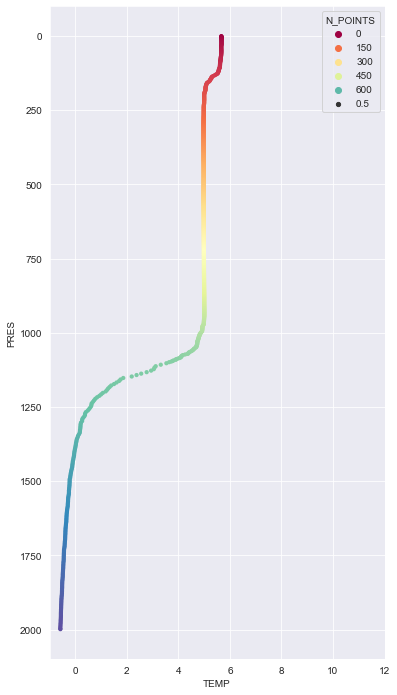

In [35]:
# Fetch and plot a single profile 
sns.set_style("darkgrid")

wmoId = 6903550
ds = argo_loader.profile(wmoId, 34).to_xarray()
df0 = ds.to_dataframe()      # Points
df1 = ds.argo.point2profile().to_dataframe()  # Profile
# df2 = argo_loader.profile(wmoId, np.arange(12,45)).to_xarray().argo.point2profile().to_dataframe()
# print(df1)

# cmap = sns.color_palette("Spectral", as_cmap=True)
fig = plt.figure(figsize=(6,12))
h = sns.scatterplot(data=df0,x='TEMP',y='PRES',hue='N_POINTS', palette='Spectral', edgecolor='none', size=0.5)
h.axes.invert_yaxis()
plt.xlim((-1,12))
plt.show()



<Figure size 432x864 with 0 Axes>

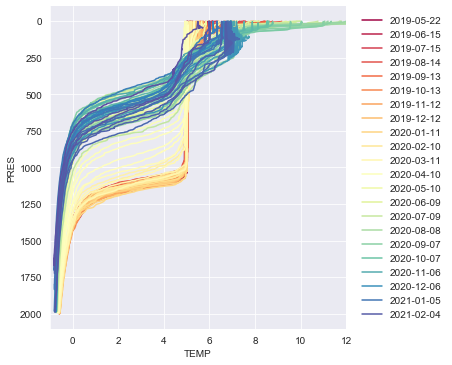

In [22]:
# Get all of the float's profiles in a data frame
# df2 = argo_loader.profile(wmoId, np.arange(12,15)).to_xarray().argo.point2profile().to_dataframe().     # This just gets profiles 12-15
df2 = argo_loader.float(wmoId).to_xarray().argo.point2profile().to_dataframe()

# Pesky plotting details: plot each profile in a different color by date
fig = plt.figure(figsize=(6,12))
h = sns.relplot(data=df2, x="TEMP", y="PRES", hue="TIME", palette='Spectral', kind='line')
ax0 = plt.gca()
ax0.invert_yaxis()
plt.xlim((-1,12))
hl,l = ax0.get_legend_handles_labels()
l = [e[0:10] for e in l]  # date (chop off time)

# Remove the default legend and replace it with entry every 6 profiles (30 d)
h._legend.remove()
skip=6
# skip=1
plt.legend(hl[0:-1:skip], l[0:-1:skip], loc='right', frameon=False, bbox_to_anchor=(1.35, 0.5))
plt.show()

# ds = argo_loader.profile(wmoId, np.arange(12,45)).to_xarray()
# ds = argo_loader.profile(wmoId, [1,12]).to_xarray()

In [23]:
df2.head()

CYCLE_NUMBER DATA_MODE DIRECTION  PLATFORM_NUMBER  \
N_LEVELS N_PROF                                                      
0        0                  1         R         A          6903550   
         1                  2         R         A          6903550   
         2                  3         R         A          6903550   
         3                  4         R         A          6903550   
         4                  5         R         A          6903550   

                 POSITION_QC  PRES    PSAL   TEMP  TIME_QC  \
N_LEVELS N_PROF                                              
0        0                 1  0.36  35.077  5.022        1   
         1                 1  1.40     NaN  5.130        1   
         2                 1  1.40     NaN  5.055        1   
         3                 1  1.50     NaN  5.067        1   
         4                 1  0.38  35.057  5.175        1   

                                     TIME   LATITUDE  LONGITUDE  
N_LEVELS N_PROF                                                  
0        0       2019-05-22T11:19:00.000Z  70.234007   1.338965  
         1       2019-05-24T11:18:00.000Z  70.307170   1.125112  
         2       2019-05-26T11:21:00.000Z  70.326967   1.196560  
         3       2019-05-31T11:23:00.000Z  70.208137   1.676447  
         4       2019-06-05T11:10:00.000Z  70.095422   2.084832

In [27]:

index_loader = ArgoIndexFetcher()

#Local ftp backend instead of defaukt erddap
#index_loader = ArgoIndexFetcher(backend='localftp',path_ftp='/path/to/your/argo/ftp/',index_file='ar_index_global_prof.txt')

# collection of floats:
idx=index_loader.float([6902910,6903006,6903546,6903550])   

# then you can see you index as a pandas dataframe or a xarray dataset :
df = idx.to_dataframe()
# idx.to_xarray()


,file,date,longitude,latitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,coriolis/6903546/profiles/D6903546_002.nc,2018-06-10 20:24:00,-4.574,73.996,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
1,coriolis/6903546/profiles/D6903546_003.nc,2018-06-20 20:20:00,-5.476,74.326,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
2,coriolis/6903546/profiles/D6903546_004.nc,2018-06-30 20:22:00,-5.034,74.571,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
3,coriolis/6903546/profiles/D6903546_005.nc,2018-07-10 20:24:00,-5.481,74.791,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"
4,coriolis/6903546/profiles/D6903546_006.nc,2018-07-20 20:31:00,-5.216,74.832,A,844,IF,2019-08-21 16:13:05,6903546,"Ifremer, France","Arvor, Seabird conductivity sensor"


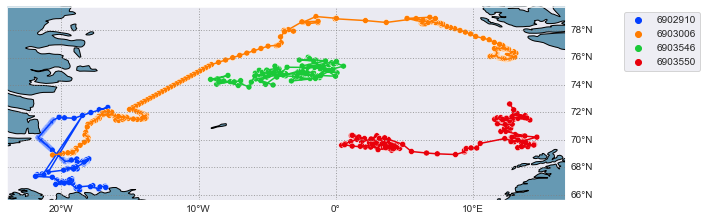

In [28]:
idx.plot('trajectory')
df.head()

In [26]:
import xarray as xr
argo_loader = ArgoDataFetcher(src='erddap', dataset='bgc')

wmoId = 6903550
profileNumber = 34
ds = argo_loader.profile(wmoId, profileNumber).to_xarray().to_dataframe()
ds.head()

FileNotFoundError: https://www.ifremer.fr/erddap/tabledap/ArgoFloats.nc?data_mode,latitude,longitude,position_qc,time,time_qc,direction,platform_number,cycle_number,config_mission_number,vertical_sampling_scheme,pres,temp,psal,pres_qc,temp_qc,psal_qc,pres_adjusted,temp_adjusted,psal_adjusted,pres_adjusted_qc,temp_adjusted_qc,psal_adjusted_qc,pres_adjusted_error,temp_adjusted_error,psal_adjusted_error&platform_number=~"6903550"&cycle_number=~"34"&distinct()&orderBy("time,pres")

In [12]:
argopy.dashboard(6903550)
